<a href="https://colab.research.google.com/github/Joann076/Assignment-2/blob/main/Assignment1JH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from google.colab import files
files.upload()
MyData = pd.read_csv('scienceTopics.csv')

Saving scienceTopics.csv to scienceTopics (1).csv


In [27]:
MyData.head()

,Topics,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [28]:
sortedData = MyData.sort_values(by='Very interested', ascending=False)

In [29]:
print(sortedData)

                       Topics  Very interested  Somewhat interested  \
1  Data Analysis / Statistics             1688                  444   
5            Machine Learning             1629                  477   
3          Data Visualization             1340                  734   
0   Big Data (Spark / Hadoop)             1332                  729   
4               Deep Learning             1263                  770   
2             Data Journalism              429                 1081   

   Not interested  
1              60  
5              74  
3             102  
0             127  
4             136  
2             610  


In [30]:
Sum_respondents = 2233

countColumns = ['Very interested','Somewhat interested', 'Not interested']

In [31]:
for col in countColumns:
    MyData[col] = (MyData[col] / Sum_respondents) * 100
    MyData[col] = MyData[col].round(2)

In [32]:
print(MyData)

                       Topics  Very interested  Somewhat interested  \
0   Big Data (Spark / Hadoop)            59.65                32.65   
1  Data Analysis / Statistics            75.59                19.88   
2             Data Journalism            19.21                48.41   
3          Data Visualization            60.01                32.87   
4               Deep Learning            56.56                34.48   
5            Machine Learning            72.95                21.36   

   Not interested  
0            5.69  
1            2.69  
2           27.32  
3            4.57  
4            6.09  
5            3.31  


In [33]:
# Bar Chart plot settings
figureSize = (20, 8)
bar_width = 0.8
custom_colors = ['#5cb85c', '#5bc0de', '#d9534f']
fontSize = 12

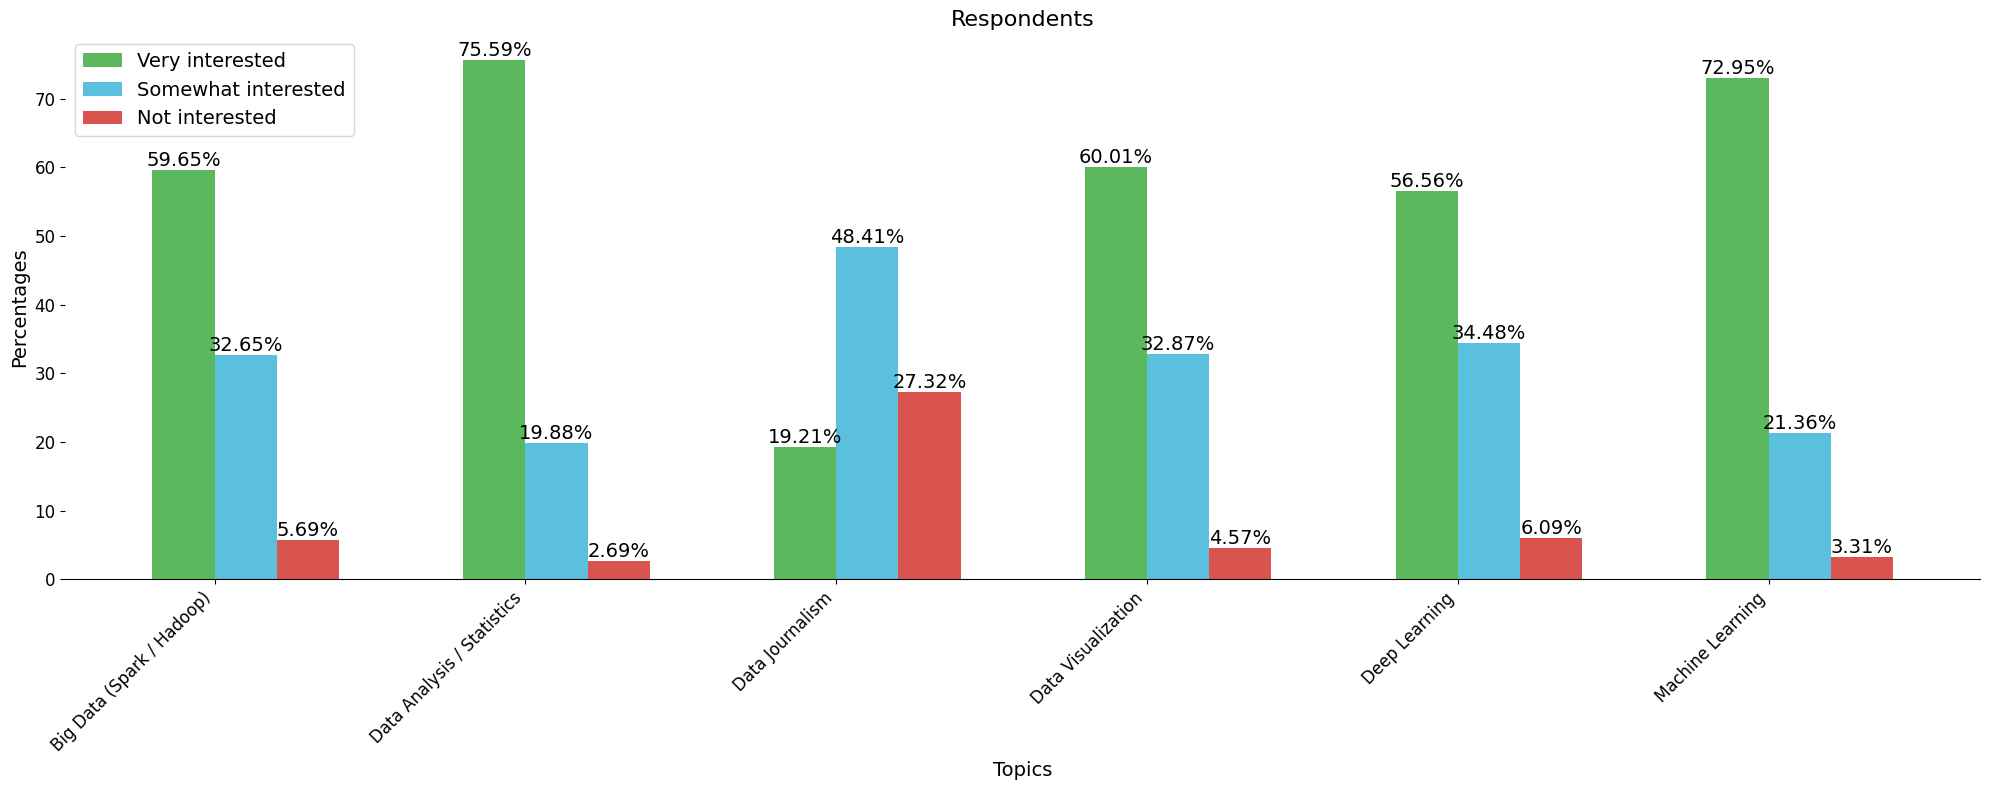

In [34]:

plt.figure(figsize=figureSize)

topics = MyData['Topics']
bar_width = 0.2  # set the bar width
bar_positions = range(len(topics))

custom_colors = ['#5cb85c', '#5bc0de', '#d9534f']  # Define custom colors

for i, col in enumerate(MyData.columns[1:], 1):  # Start at 1 to skip the topic column
    plt.bar(
        [pos + i * bar_width for pos  in bar_positions],
        MyData[col],
        width=bar_width,
        label=col,
        color=custom_colors.pop(0)
    )

# labelling the chart
plt.xlabel('Topics', fontsize=14)
plt.ylabel('Percentages', fontsize=14)
plt.title('Respondents', fontsize=16)

plt.xticks([pos + bar_width * (len(MyData.columns) - 1) / 2 for pos in bar_positions], topics, rotation=45, ha='right', fontsize=fontSize)
plt.yticks(fontsize=fontSize)
plt.legend(fontsize=14)

# Add font size 14 for bar labels
for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}%',  # Display percentages
        ha='center',
        va='bottom',
        fontsize=14
    )

# Remove left, top, and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

**Part 2 - Supervised Learning Using Tree-Based Model**

In [54]:
from google.colab import files
files.upload()
ClaimData = pd.read_csv('ClaimsData.csv')

Saving ClaimsData.csv to ClaimsData (1).csv


In [55]:
ClaimData.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


Text(0.5, 1.0, 'Claims Vs Age')

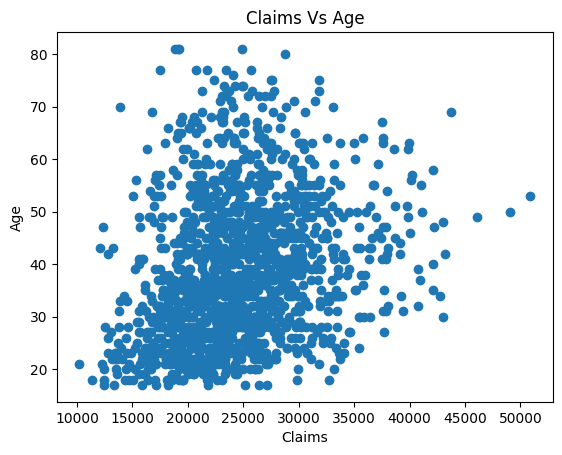

In [56]:
plt.scatter(ClaimData['Claim'], ClaimData['AgeP'])

plt.xlabel('Claims')
plt.ylabel('Age')
plt.title('Claims Vs Age')

Text(0.5, 1.0, 'Claims Vs Mileage')

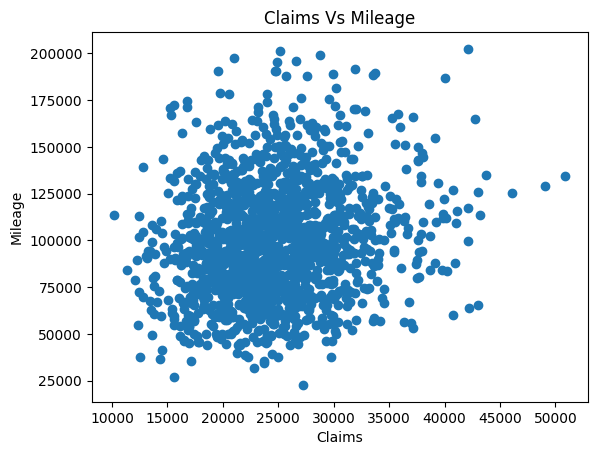

In [57]:
plt.scatter(ClaimData['Claim'], ClaimData['Mileage'])

plt.xlabel('Claims')
plt.ylabel('Mileage')
plt.title('Claims Vs Mileage')

<Figure size 1200x600 with 0 Axes>

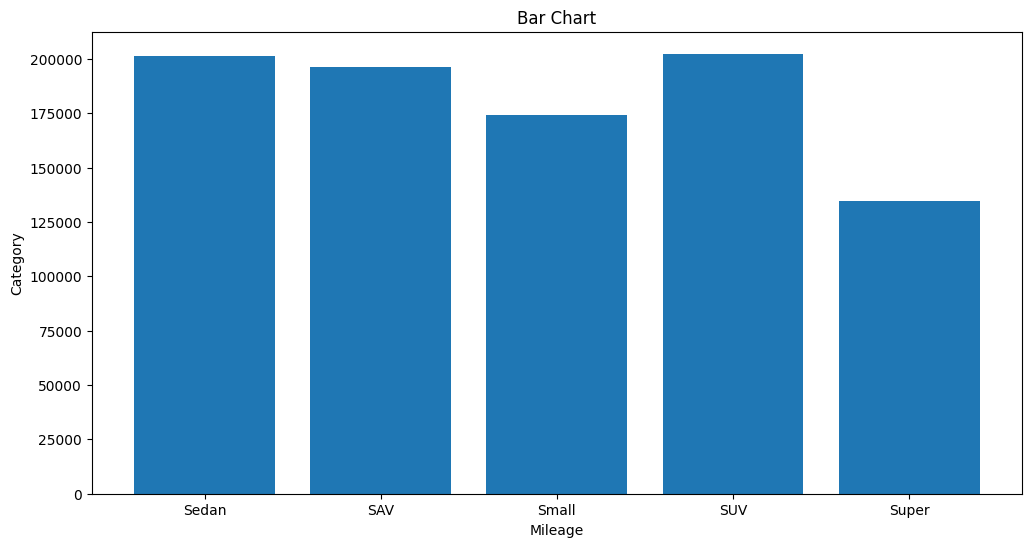

In [58]:
# Increase the figure size
figureSize = (12, 6)
plt.figure(figsize=figureSize)

# Extract 'Category' and 'Claims' columns from the data
categories = ClaimData['Category']
mileage = ClaimData['Mileage']

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(categories, mileage)

plt.xlabel('Mileage')
plt.ylabel('Category')
plt.title('Bar Chart')

# show bar chart
plt.show()











<Figure size 1200x600 with 0 Axes>

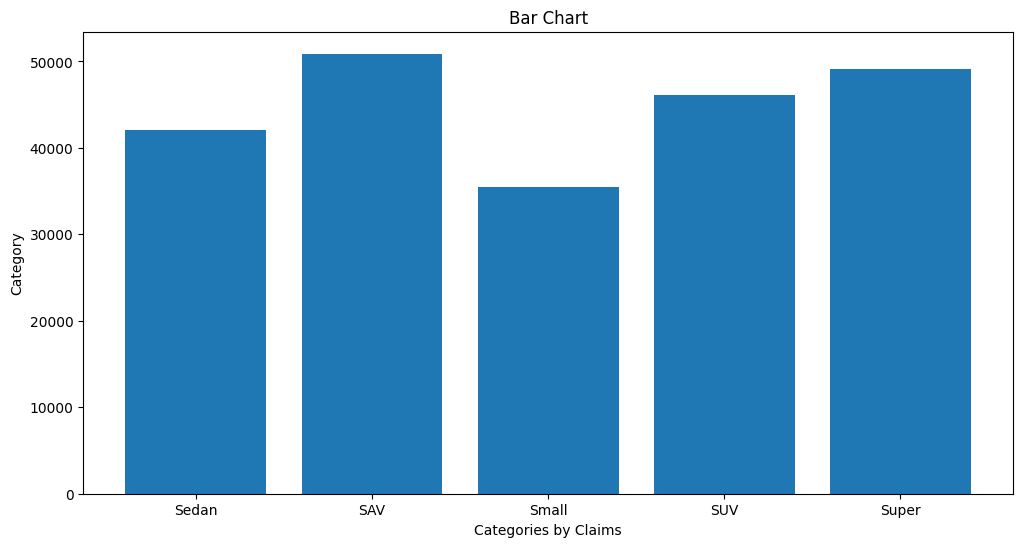

In [60]:
# Increase the figure size
figureSize = (12, 6)
plt.figure(figsize=figureSize)

# Extract 'Category' and 'Claims' columns from the data
categories = ClaimData['Category']
claims = ClaimData['Claim']

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(categories, claims)

plt.xlabel('Categories by Claims')
plt.ylabel('Category')
plt.title('Bar Chart')

# show bar chart
plt.show()

In [61]:
ClaimData.groupby('ModelYear')['Claim'].mean().round(2)

ModelYear
2011    21251.20
2012    22089.08
2013    22797.42
2014    24559.40
2015    24396.63
2016    24930.40
2017    24859.32
2018    24844.63
2019    25487.11
Name: Claim, dtype: float64

In [37]:
# EDA: Calculation 1 (Mean Claim Amount by Vehicle Category)
vehicle_category_mean_claim = ClaimData.groupby('Category')['Claim'].mean()
print("Mean Claim Amount by Vehicle Category:")
print(vehicle_category_mean_claim)

Mean Claim Amount by Vehicle Category:
Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [62]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# Deefine the X and Y variable
X = ClaimData[['Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned', 'ServHist']]
y = ClaimData['Claim']

In [39]:
# Convert category variables to numbers
X = pd.get_dummies(X, columns=['Category', 'PreOwned', 'ServHist'], drop_first=True)

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
regressor = DecisionTreeRegressor(max_depth=2)  # Depth of the Tree
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [42]:
# to display textual representation of the decision tree
tree_rules = export_text(regressor, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- PreOwned_Yes <= 0.50
|   |--- AgeP <= 33.50
|   |   |--- value: [21489.39]
|   |--- AgeP >  33.50
|   |   |--- value: [24833.64]
|--- PreOwned_Yes >  0.50
|   |--- Category_SUV <= 0.50
|   |   |--- value: [26135.67]
|   |--- Category_SUV >  0.50
|   |   |--- value: [31111.87]



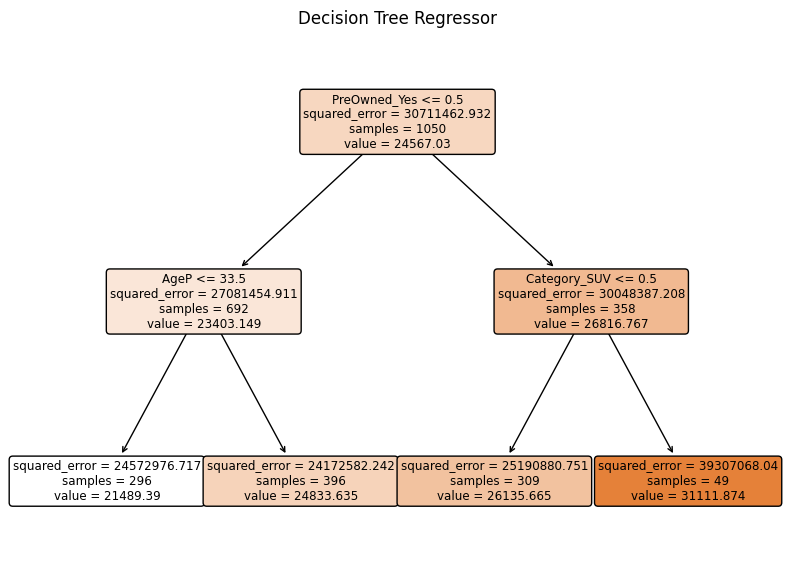

In [43]:
# Decision tree visualization
plt.figure(figsize=(10, 7))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

A decision tree in this case is more appropriate because Decision Trees is often suitable for smaller to medium datasets with structured and tabular data. They allow you to handle categorical features well and are interpretable, while Neural networks works best at capturing complex, non-linear relationships in data.

In [63]:
notebook_path ='Assignment1JH.ipynb'
!pip install -q matplotlib2pdf
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!jupyter nbconvert --to pdf '$notebook_path'


ERROR: Could not find a version that satisfies the requirement matplotlib2pdf (from versions: none)
ERROR: No matching distribution found for matplotlib2pdf
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-font